# AUTOENCODER

In [5]:
import os
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
import matplotlib.pyplot as plt
%matplotlib inline

if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')


def to_img(x):
    x = x.view(x.size(0), 1, 28, 28)
    return x

num_epochs = 200
batch_size = 128
learning_rate = 1e-3


def plot_sample_img(img, name):
    img = img.view(1, 28, 28)
    save_image(img, './sample_{}.png'.format(name))


def min_max_normalization(tensor, min_value, max_value):
    min_tensor = tensor.min()
    tensor = (tensor - min_tensor)
    max_tensor = tensor.max()
    tensor = tensor / max_tensor
    tensor = tensor * (max_value - min_value) + min_value
    return tensor


def tensor_round(tensor):
    return torch.round(tensor)

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda tensor:min_max_normalization(tensor, 0, 1)),
    transforms.Lambda(lambda tensor:tensor_round(tensor))
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(True),
            nn.Linear(256, 64),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(True),
            nn.Linear(256, 28 * 28),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder().cuda()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
#         print(img)
#         print(img.size())
#         print('--------------------------')
        img = img.view(img.size(0), -1)
#         print(img)
#         print(img.size())
#         print('--------------------------')
        img = Variable(img).cuda()
        # ===================forward=====================
        output = model(img)
        #MIDIMG=model.encoder(img).view(img.size(0),8,8).cpu().detach().numpy()
        #MIDIMG=MIDIMG[0]
        #MIDIMG=np.rint(MIDIMG/np.sum(MIDIMG)*255)
        #print(MIDIMG)
        #plt.imshow(MIDIMG)
        #plt.show()
        loss = criterion(output, img)
        MSE_loss = nn.MSELoss()(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}, MSE_loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.data[0], MSE_loss.data[0]))
    if epoch % 20 == 0:
        x = to_img(img.cpu().data)
        x_hat = to_img(output.cpu().data)
        save_image(x, './mlp_img/x_{}.png'.format(epoch))
        save_image(x_hat, './mlp_img/x_hat_{}.png'.format(epoch))

torch.save(model.state_dict(), './sim_autoencoder.pth')

E:\Installations\Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:105: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch [1/200], loss:0.1157, MSE_loss:0.0363
epoch [2/200], loss:0.0862, MSE_loss:0.0261
epoch [3/200], loss:0.0709, MSE_loss:0.0214
epoch [4/200], loss:0.0645, MSE_loss:0.0192
epoch [5/200], loss:0.0542, MSE_loss:0.0159
epoch [6/200], loss:0.0538, MSE_loss:0.0159
epoch [7/200], loss:0.0546, MSE_loss:0.0161
epoch [8/200], loss:0.0542, MSE_loss:0.0160
epoch [9/200], loss:0.0512, MSE_loss:0.0151
epoch [10/200], loss:0.0499, MSE_loss:0.0145
epoch [11/200], loss:0.0467, MSE_loss:0.0138
epoch [12/200], loss:0.0431, MSE_loss:0.0125
epoch [13/200], loss:0.0425, MSE_loss:0.0126
epoch [14/200], loss:0.0424, MSE_loss:0.0124
epoch [15/200], loss:0.0386, MSE_loss:0.0112
epoch [16/200], loss:0.0431, MSE_loss:0.0126
epoch [17/200], loss:0.0426, MSE_loss:0.0123
epoch [18/200], loss:0.0381, MSE_loss:0.0112
epoch [19/200], loss:0.0373, MSE_loss:0.0108
epoch [20/200], loss:0.0402, MSE_loss:0.0118
epoch [21/200], loss:0.0368, MSE_loss:0.0106
epoch [22/200], loss:0.0386, MSE_loss:0.0113
epoch [23/200], los

epoch [182/200], loss:0.0264, MSE_loss:0.0075
epoch [183/200], loss:0.0252, MSE_loss:0.0071
epoch [184/200], loss:0.0226, MSE_loss:0.0063
epoch [185/200], loss:0.0237, MSE_loss:0.0068
epoch [186/200], loss:0.0229, MSE_loss:0.0064
epoch [187/200], loss:0.0223, MSE_loss:0.0065
epoch [188/200], loss:0.0232, MSE_loss:0.0066
epoch [189/200], loss:0.0255, MSE_loss:0.0072
epoch [190/200], loss:0.0234, MSE_loss:0.0065
epoch [191/200], loss:0.0231, MSE_loss:0.0066
epoch [192/200], loss:0.0255, MSE_loss:0.0073
epoch [193/200], loss:0.0266, MSE_loss:0.0076
epoch [194/200], loss:0.0240, MSE_loss:0.0067
epoch [195/200], loss:0.0233, MSE_loss:0.0066
epoch [196/200], loss:0.0221, MSE_loss:0.0062
epoch [197/200], loss:0.0229, MSE_loss:0.0064
epoch [198/200], loss:0.0243, MSE_loss:0.0069
epoch [199/200], loss:0.0218, MSE_loss:0.0061
epoch [200/200], loss:0.0221, MSE_loss:0.0062


# Encoded IMAGE

E:\Installations\Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:105: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch [1/2], loss:0.1117, MSE_loss:0.0345
epoch [2/2], loss:0.0845, MSE_loss:0.0257
[[ 0.  0.  0.  9.  4.  0.  0.  0.]
 [ 9.  5.  1.  2. 10. 12.  0.  0.]
 [ 0.  5.  5.  6.  8.  5.  8. 12.]
 [ 7.  2.  0.  0.  9.  0.  3.  9.]
 [ 9.  0.  5.  0.  0.  0.  0.  5.]
 [ 7.  0.  6.  3.  8. 10.  6.  6.]
 [ 6.  3.  7.  0.  1.  0.  2.  8.]
 [ 4.  5.  0.  0.  4.  0. 10.  6.]]


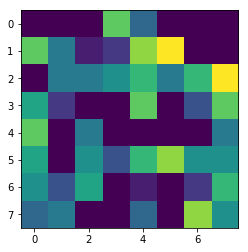

In [9]:
import os
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
import matplotlib.pyplot as plt
%matplotlib inline

if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')


def to_img(x):
    x = x.view(x.size(0), 1, 28, 28)
    return x

num_epochs = 2
batch_size = 128
learning_rate = 1e-3


def plot_sample_img(img, name):
    img = img.view(1, 28, 28)
    save_image(img, './sample_{}.png'.format(name))


def min_max_normalization(tensor, min_value, max_value):
    min_tensor = tensor.min()
    tensor = (tensor - min_tensor)
    max_tensor = tensor.max()
    tensor = tensor / max_tensor
    tensor = tensor * (max_value - min_value) + min_value
    return tensor


def tensor_round(tensor):
    return torch.round(tensor)

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda tensor:min_max_normalization(tensor, 0, 1)),
    transforms.Lambda(lambda tensor:tensor_round(tensor))
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(True),
            nn.Linear(256, 64),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(True),
            nn.Linear(256, 28 * 28),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder().cuda()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
#         print(img)
#         print(img.size())
#         print('--------------------------')
        img = img.view(img.size(0), -1)
#         print(img)
#         print(img.size())
#         print('--------------------------')
        img = Variable(img).cuda()
        # ===================forward=====================
        output = model(img)
#         MIDIMG=model.encoder(img).view(img.size(0),8,8).cpu().detach().numpy()
#         MIDIMG=MIDIMG[0]
#         MIDIMG=np.rint(MIDIMG/np.sum(MIDIMG)*255)
#         print(MIDIMG)
#         plt.imshow(MIDIMG)
#         plt.show()
        loss = criterion(output, img)
        MSE_loss = nn.MSELoss()(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}, MSE_loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.data[0], MSE_loss.data[0]))
    if epoch % 20 == 0:
        x = to_img(img.cpu().data)
        x_hat = to_img(output.cpu().data)
        save_image(x, './mlp_img/x_{}.png'.format(epoch))
        save_image(x_hat, './mlp_img/x_hat_{}.png'.format(epoch))
        
        
MIDIMG=model.encoder(img).view(img.size(0),8,8).cpu().detach().numpy()
MIDIMG=MIDIMG[0]
MIDIMG=np.rint(MIDIMG/np.sum(MIDIMG)*255)
print(MIDIMG)
plt.imshow(MIDIMG)
plt.show()
torch.save(model.state_dict(), './sim_autoencoder.pth')